# Numeriske integrasjonsmetoder

## Trapesmetoden

I riemannsummen tilnærmer man $f$ på hvert intervall $[x_{k-1}, x_k]$ med et rektangel med høyde $f(x_k^*)$, og tilnærmingen av integralet blir arealet av rektangelet, $h f(x_k^*)$.

Et alternativ til dette er å tilnærme integralet av $f$ over $[x_{k-1},x_k]$ med arealet av trapeset med hjørner i $(x_{k-1},0)$, $(x_{k},0)$, $(x_{k-1},f(x_{k-1}))$ og $(x_k,f(x_k))$, som er $\frac{h}{2} (f(x_{k-1})+f(x_k))$.
Dette er *trapesmetoden*, hvor vi altså tilnærmer

$$ \int_{x_{k-1}}^{x_k}f(x)\,\mathrm{d}x \quad \text{med} \quad \frac{h}{2}\left(f(x_{k-1}) + f(x_k) \right), $$

og for en tilstrekkelig glatt funksjon vil feilen vi gjør være proporsjonal med $f''(c_k)h^3$ for en $c_k \in (x_{k-1},x_k)$.

Ved å gjøre denne tilnærmingen på hvert delintervall i $[a,b]$ og summere bidragene får vi det som kalles (kompositt-)trapesmetoden for det bestemte integralet av $f$ over $[a,b]$,
og vi skriver $T_n$ for tilnærmingen med $n$ delintervaller, som blir
$$ T_n = \frac{h}{2}\sum_{k=1}^n (f(x_{k-1}) + f(x_k)) = \frac{h}{2} \left( f(x_0) + 2f(x_1) + 2f(x_2) + \dots + 2f(x_{n-1}) + f(x_n)\right).$$

Siden feilen vi gjør på hvert delintervall akkumuleres vil ikke feilen være kubisk i $h$, men kvadratisk: man kan vise at $\sum_{k=1}^n f''(c_k) = n f''(c)$ for en $c \in (a,b)$, og siden $nh = b-a$ vil feilen med (kompositt-)trapesmetoden $T_n - I$ være proporsjonal med $(b-a)h^2 f''(c)$.

I praksis betyr dette at dersom vi for eksempel halverer skrittlengden $h$ så forventer vi at feilen med trapesmetoden vil være en fjerdedel av det den var, siden $(1/2)^2 = 1/4$.

>#### Eksempel:
Som i det tidligere eksempelet med riemannsummer, er den heltrukne blå kurven nedenfor grafen til funksjonen
>
>$$ f(x) = 2+\frac{x}{2}-\sin\left(\frac{\pi x}{2}\right) $$
>
>på intervallet $[-2,2]$. Denne gangen tilnærmer vi det bestemte integralet av $f$ over intervallet, eller om du vil, arealet under grafen, med trapesmetoden og fire delintervaller.
>
><img src="1_trapes.png" style="width: 40%">
>
>Tilnærmingen av arealet under grafen er nå gitt av summen av arealene til de fire trapesene.

Nedenfor har vi tilsvarende figur som i eksempelet over, men illustrert ved hjelp av `pyplot`.
Du kan øke antall rektangler `N = 4` og se hvordan arealet av rektanglene gir en bedre tilnærming av arealet under grafen.

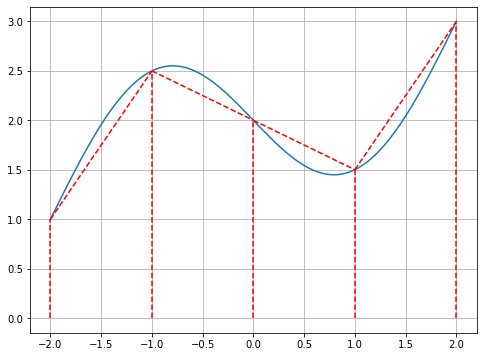

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def f(x):
    return 2+x/2-np.sin(np.pi*x/2)

y = np.linspace(-2,2,101) # 101 jevn fordelte punkter i [-2,2]

N = 4 # antall rektangler N
xs = np.linspace(-2,2,N+1) # partisjon av [-2,2] med N+1 punkter

plt.figure(figsize=(8,6))
plt.plot(y,f(y))
plt.grid(True)
for k in range(0,N):
    plt.plot([xs[k],xs[k+1]],[f(xs[k]),f(xs[k+1])],'r--')
    plt.plot([xs[k+1],xs[k+1]], [0,f(xs[k+1])],'r--')
plt.plot([xs[0],xs[0]], [0,f(xs[0])],'r--')

## Simpsons metode

Trapesmetoden kan tenkes på som at man på hvert delintervall $[x_{k-1}, x_k]$ interpolerer $f$ med et førstegrads polynom (en lineær funksjon), det vil si linjestykket som går fra $(x_{k-1},f(x_{k-1}))$ til $(x_k,f(x_k))$. Tilnærmingen $S_n$ er da hva man får ved å integrere interpolasjonsfunksjonen eksakt.

Idéen bak *Simpsons metode* er at man vil få en bedre tilnærming ved å bruke et andreordens polynom.
For å interpolere med et andreordens polynom trenger vi funksjonsverdien i tre påfølgende punkter $x_{k-2}$, $x_{k-1}$ og $x_k$; altså kan vi tenke oss at vi ser på to delintervaller $[x_{k-2},x_{k-1}]$ og $[x_{k-1},x_k]$ samtidig.
Derfor er det viktig at antallet delintervaller $n$ er et partall, $n = 2m$ for et heltall $m$ slik at $[a,b]$ kan deles opp i $m$ delintervaller $[x_{2(k-1)},x_{2k}]$.

$$ \int_{x_{2k-2}}^{x_{2k}}f(x)\,\mathrm{d}x \quad \text{med} \quad \frac{h}{3}\left(f(x_{2k-2}) + 4f(x_{2k-1}) + f(x_{2k}) \right), $$
Feilen er her proporsjonal med $h^5 f^{(4)}(c_k)$ for en $c_k \in (x_{2k-2},x_{2k})$, hvor $f^{(4)}$ er den fjerdederiverte av $f$.

Ved å summere bidragene fra hvert av de $m$ parene av delintervaller får vi komposittversjonen av Simpsons metode, hvor tilnærmingen $S_n = S_{2m}$ er gitt av

$$ S_n  = \frac{h}{3}\sum_{k=1}^{m}(f(x_{2k-2}) + 4f(x_{2k-1}) + f(x_{2k})) = \frac{h}{3} \left( f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \dots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \right). $$
På tilsvarende vis som for trapesmetoden kan vi utlede at feilen $S_n - I$ er proporsjonal med $h^4 f^{(4)}(c)$ for en $c \in (a,b)$.

>#### Eksempel:
>Nok en gang ser vi på intervallet $[-2,2]$ og funksjonen
>
>$$ f(x) = 2+\frac{x}{2}-\sin\left(\frac{\pi x}{2}\right), $$
>
>og igjen bruker vi $n=4$ delintervaller, som tilsvarer å kjenne verdien av $f$ i fem punkter.
Dette er et partall, $n = 2m$ for $m=2$, som betyr at Simpsons metode tilnærmer $f$ med $m=2$ annengradspolynomer på $m=2$ intervaller.
Det første interpolerer punktene $(x_0,f(x_0))$, $(x_1,f(x_1))$ og $(x_2,f(x_2))$, og det andre interpolerer $(x_2,f(x_2))$, $(x_3,f(x_3))$ og $(x_4,f(x_4))$.
>
><img src="1_simpson.png" style="width: 40%">
>
>Tilnærmingen av det bestemte integralet, eller arealet under grafen, av $f$ er da summen av arealene under hver av de to polynomene på hvert sitt intervall $[x_0,x_2]$ og $[x_2,x_4]$.
>
>Fra figuren kan vi se med egne øyne at avviket er langt mindre her enn for trapesmetoden i forrige eksempel.

## Numerisk integrasjon og avvik

Til nå har eksempelene vært illustrerende, det er på tide med et regneeksempel.

> #### Eksempel:
La oss tilnærme integralet av $f(x) = e^x$ over intervallet $[-1,1]$ med både trapesmetoden og Simpsons metode for $n=2$, det vil si $n+1=3$ funksjonsverdier.
Partisjonen vår består da av $x_0 = -1$, $x_1 = 0$ og $x_2 = 1$, med $h = 1$.
>
>Trapesmetoden tilsvarer da å tilnærme med $n=2$ trapeser, og gir oss tilnærmingen
>
>$$ T_2 = \frac12 \left(e^{-1} + 2 + e^{1} \right) = 1 + \cosh(1).$$
>
>Siden $n=2m$ for $m=1$ tilsvarer Simpsons metode å tilnærme med det bestemte integralet av polynomet som interpolerer de tre punktene, og dette gir verdien
>
>$$ S_2 = \frac{1}{3} \left(e^{-1} + 4 + e^{1}\right) = \frac{4+2\cosh(1)}{3}. $$
>
>Vi kan regne ut det eksakte svaret er $e^1-e^{-1} = 2 \sinh(1)$, og og med det sjekke at $S_2$ gir en bedre tilnærming enn $T_2$.

Vi kan bruke Python til å sjekke at dette er tilfelle:

In [2]:
errT = np.abs(1+np.cosh(1)-2*np.sinh(1))
errS = np.abs((4+2*np.cosh(1))/3-2*np.sinh(1))
print('Feilen med trapesmetoden er ca. {:.3f}, men feilen med Simpsons metode er ca. {:.3f}.'.format(errT,errS))

Feilen med trapesmetoden er ca. 0.193, men feilen med Simpsons metode er ca. 0.012.


La oss demonstrere at Simpsons metode gir langt mindre avvik enn trapesmetoden ved å se hvordan feilen i eksempelet ovenfor endrer seg med antall delintervaller gitt av $n = 2^k$ for økende $k$.

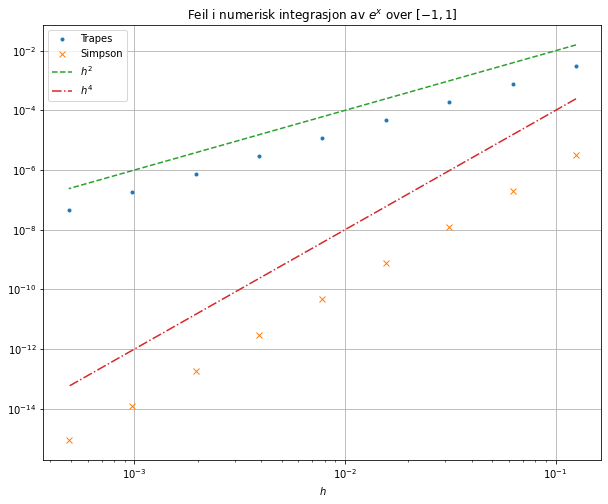

In [3]:
def f(x):
    return np.exp(x)

def trapes(f,a,b,n):
    # f funksjon, intervall [a,b], n delintervaller
    h = (b-a)/n
    xk = np.linspace(a,b,n+1)
    fk = f(xk)
    return (h/2)*np.sum(fk[0:n]+fk[1:])

def simpson(f,a,b,n):
    # f funksjon, intervall [a,b], n=2m delintervaller
    h = (b-a)/n
    xk = np.linspace(a,b,n+1)
    fk = f(xk)
    return (h/3)*(np.sum(fk[0:n-1:2] + fk[2:n+1:2] + 4*fk[1:n+1:2]) )

pmin = 4 # minste verdi av k
pmax = 12 # største verdi av k
N = pmax-pmin+1 # antall ulike k-verdier

I = np.zeros([N,2]) # array for å lagre tilnærminger

a = -1
b = 1
hk = np.zeros(N) # array for å lagre de ulike steglengdene

for k in range(0,N):
    n = 2**(pmin+k) # antall delintevaller
    hk[k] = (b-a)/n # steglengde
    I[k,0] = trapes(f,a,b,n) # tilnærming med trapesmetoden
    I[k,1] = simpson(f,a,b,n) # tilnærming med Simpsons metode

ans = 2*np.sinh(1) # korrekt verdi
err = np.abs(I-ans) # feilen

plt.figure(figsize=(10,8))

plt.loglog(hk,err[:,0],'.') # avvik for trapesmetoden
plt.loglog(hk,err[:,1],'x') # avvik for Simpsons metode

plt.loglog(hk,hk**2,'--') # referanselinje h^2
plt.loglog(hk,hk**4,'-.') # referanselinje h^4

plt.title('Feil i numerisk integrasjon av $e^x$ over $[-1,1]$')
plt.grid(True)
plt.xlabel('$h$')
plt.legend(['Trapes','Simpson','$h^2$','$h^4$'])

Vi ser at avvikene for trapesmetoden ligger parallelt med grafen til $f(h)=h^2$, imens avvikene for Simpsons metode ligger parallelt med grafen til $f(h)=h^4$.
Dette viser, som forventet, at feilen med trapesmetoden avtar som $h^2$ og feilen med Simpsons metode avtar som $h^4$.